In [1]:
import sys
import os

# Add project root (works anywhere, even inside Docker)
project_root = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
sys.path.append(project_root)

# Import your library
from lib.plot.plot_lib import (
    bluish_color_list,
    plot_pivot_bar

)
from lib.clean.clean_lib import null_data, most_frequent_values,number_unique_values

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [4]:
display(train_df.head(3))

display(test_df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Missing data, Most Frequent Items, Unique Values

In [5]:
null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Null,0,0,0,0,0,177,0,0,0,0,687,2
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.1,0.2
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [6]:
most_frequent_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequency,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total non-null,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [7]:
number_unique_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Number of uniques,891,2,3,891,2,88,7,7,681,248,147,3



<div style="margin-left:7%;width:80%;">

### **Combining Train and Test Sets with a Dataset Identifier**

We merge the original Titanic training and test datasets into a single DataFrame so that we can apply consistent data cleaning, feature engineering, and exploratory analysis across both sets. After concatenation, we create a new column called `"set"` to keep track of each row’s origin:

* All rows are initially labeled `"train"`.
* Rows that belong to the original test dataset are identified because their `Survived` value is missing (`NaN`).
* These rows are relabeled as `"test"`.

This allows us to work with a unified dataset while still being able to distinguish train from test during analysis or modeling.

</div>

In [8]:
all_df = pd.concat([train_df,test_df],axis=0)
all_df["set"] = "train"

all_df.loc[all_df.Survived.isna(),"set"] = "test"

display(all_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
127,1019,NaN,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q,test
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,train
161,1053,NaN,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C,test



<div style="margin-left:7%;width:80%;">

## ⭐ **3. General Introduction — Train–Test Distribution Comparison**


</div>


## 3A. Sex

sex_set_size      
set            test train
Sex                      
female          152   314
male            266   577

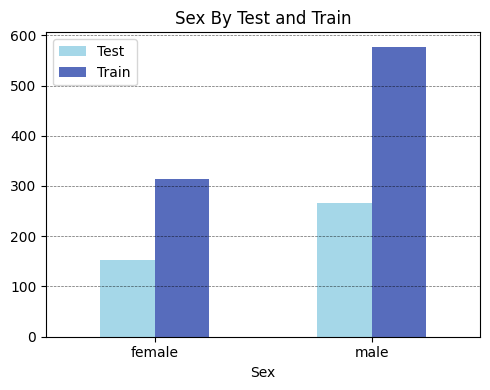

In [9]:
df_sex_set = all_df[["Sex","set"]]
df_groupby = (
    df_sex_set.groupby(["Sex","set"])
        .agg(sex_set_size=("Sex","size"))
        .reset_index()
)
df_pivot = (
    df_groupby.pivot(
        index="Sex",
        columns=["set"],
        values=["sex_set_size"]
    )
)
display(df_pivot)
title = "Sex By Test and Train"
labels = ["Test","Train"]
plt,_,_ = plot_pivot_bar(df_pivot,figsize=(5,4),width=0.5,
                           title=title,legend_labels=labels)
plt.show()

## 3B. Pclass (Passenger Class)

pclass_set_count      
set                test train
Pclass                       
1                   107   216
2                    93   184
3                   218   491

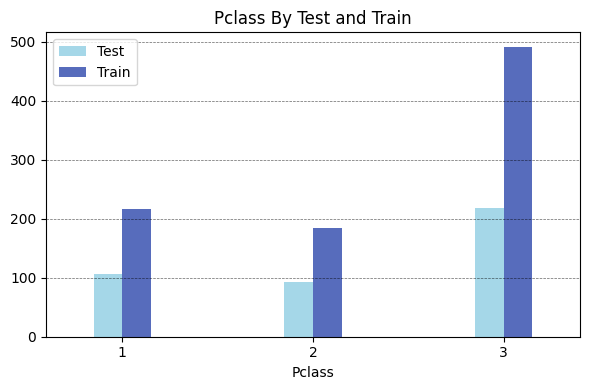

In [10]:
df_pclass_set = all_df[["Pclass","set"]]

#display(df_pclass_set.sample(5))
#print("\n ======================================== \n")

df_groupby = (
    df_pclass_set.groupby(["Pclass","set"])
        .agg(pclass_set_count=("Pclass","count"))
        .reset_index()
)

#display(df_groupby)
#print("\n ======================================== \n")

df_pivot = (
    df_groupby.pivot(
        index="Pclass",
        columns=["set"],
        values=["pclass_set_count"]
    )
)
display(df_pivot)
#print("\n ======================================== \n")

title = "Pclass By Test and Train"
labels = ["Test","Train"]

plt,_,_ = plot_pivot_bar(df_pivot,width=0.3,figsize=(6,4),
                title=title,legend_labels=labels)

plt.show()


## 3C. SibSp (Sibling Spouse)

sibsp_set_count      
set              test train
SibSp                      
0                 283   608
1                 110   209
2                  14    28
3                   4    16
4                   4    18
5                   1     5
8                   2     7

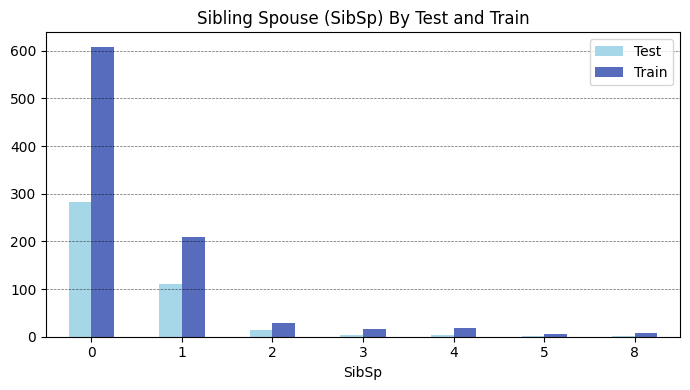

In [11]:
df_sibsp_set = all_df[["SibSp","set"]]
#display(df_sibsp_set.head())
#print("======================================== \n")

df_groupby = (
    df_sibsp_set.groupby(["SibSp","set"])
        .agg(sibsp_set_count=("SibSp","count"))
        .reset_index()
)

#display(df_groupby)
#print("======================================== \n")

df_pivot = (
    df_groupby.pivot(
        index="SibSp",
        columns=["set"],
        values=["sibsp_set_count"]
    )
)
display(df_pivot)

title = "Sibling Spouse (SibSp) By Test and Train"
labels = ["Test","Train"]

plt,_,_ = plot_pivot_bar(df_pivot,title=title,legend_labels=labels)
plt.show()
